<a href="https://colab.research.google.com/github/gaf17/Projects/blob/main/HW1_Ferguson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
data = pd.read_csv("lncRNA_5_Cancers.csv")

In [107]:
# print(data) 
# checking dimensions of data
# 241 x 12311

In [108]:
data.drop(data.columns[[0]], axis=1, inplace = True)
data.head()

,ENSG00000005206.15,ENSG00000083622.8,ENSG00000088970.14,ENSG00000099869.7,ENSG00000100181.20,ENSG00000104691.13,ENSG00000115934.11,ENSG00000117242.7,ENSG00000118412.11,ENSG00000122043.9,...,ENSGR0000223511.4,ENSGR0000223571.4,ENSGR0000226179.4,ENSGR0000230542.4,ENSGR0000234622.4,ENSGR0000236017.6,ENSGR0000236871.5,ENSGR0000237531.4,ENSGR0000270726.4,Class
0,3.390813,0.0,2.918265,0.014832,0.341984,2.194036,0.0,1.569750,1.159419,0.028200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KIRC
1,3.144547,0.0,1.961410,0.047186,1.677598,2.605298,0.0,1.180583,1.127571,0.131274,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KIRC
2,2.484817,0.0,2.896470,0.000000,0.087972,3.176764,0.0,1.690582,1.161923,0.109720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KIRC
3,2.789058,0.0,2.439171,0.022316,0.502293,2.679842,0.0,1.659525,1.463067,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KIRC
4,3.258763,0.0,1.941660,0.050283,0.098625,2.841588,0.0,1.296678,1.728514,0.019417,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KIRC


In [115]:
x = data.drop('Class', 1)
y = data['Class']
# print(y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [116]:
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_features = pca.fit_transform(x)

print('Shape before PCA: ', x.shape)
print('Shape after PCA: ', pca_features.shape)

pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])

pca_df['target'] = y
 
pca_df

Shape before PCA:  (2529, 12309)
Shape after PCA:  (2529, 2)


,PC1,PC2,target
0,-17.864791,15.904503,KIRC
1,-8.682791,9.634450,KIRC
2,-20.860309,16.121578,KIRC
3,-25.767978,19.649743,KIRC
4,-21.025951,13.430290,KIRC
...,...,...,...
2524,-2.416017,-3.437234,THCA
2525,3.469989,4.820638,THCA
2526,5.365098,9.652960,THCA
2527,6.445645,10.172874,THCA


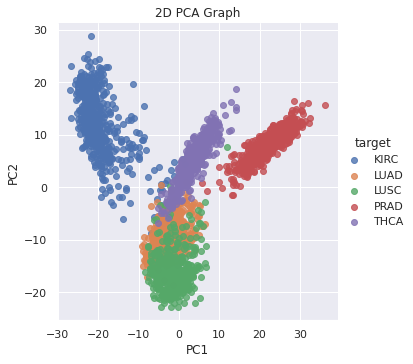

In [117]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='target', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

In [152]:
kirc = pca_df[pca_df['target']=='KIRC']
luad = pca_df[pca_df['target']=='LUAD']
lusc = pca_df[pca_df['target']=='LUSC']
prad = pca_df[pca_df['target']=='PRAD']
thca = pca_df[pca_df['target']=='THCA']

violinPC1 = [list(kirc['PC1']), list(luad['PC1']), list(lusc['PC1']), list(prad['PC1']), list(thca['PC1'])]
violinPC2 = [list(kirc['PC2']), list(luad['PC2']), list(lusc['PC2']), list(prad['PC2']), list(thca['PC2'])]

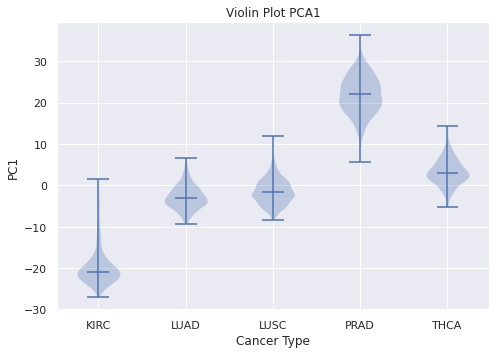

In [171]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

# Create a plot
bp = ax.violinplot(violinPC1, showmedians=True)

# Add title
ax.set_title('Violin Plot PCA1')
plt.xlabel('Cancer Type')
plt.ylabel('PC1')
ax.set_xticklabels(['NA', 'KIRC','LUAD','LUSC','PRAD', 'THCA'])
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


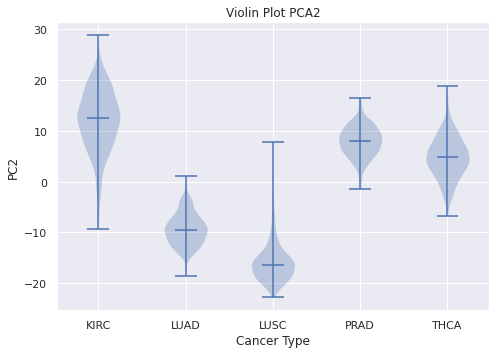

In [170]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

# Create a plot
bp = ax.violinplot(violinPC2, showmedians=True)

# Add title
ax.set_title('Violin Plot PCA2')
plt.xlabel('Cancer Type')
plt.ylabel('PC2')
ax.set_xticklabels(['NA', 'KIRC','LUAD','LUSC','PRAD', 'THCA'])
plt.show()